# Capstone Project


**Shark Attack Analysis**


The Shark Research Institute (SRI) maintains a log of shark attacks worldwide, the Global Shark Attack File (GSAF). It is continually updated as new incidents occur and was started in 1992 by the SRI. The purpose of the GSAF is to "use forensic analysis to demonstrate and emphasize the likelihood of shark/human interactions in comparison to the myriad dangers that we face in our daily lives. With a better understanding of these interactions we can minimize the possibility of being injured by a shark, and shift the discussion from fear to conservation of all shark species worldwide", per the SRI/GSAF website https://www.sharks.org/global-shark-attack-file)

The current log file, in Excel form, can be downloaded from the "chronologically" link seen on the site below:
https://www.sharks.org/global-shark-attack-file


Your goal in this project is to clean and analyze shark incidents worldwide. Some of the areas of interest in this project may include but are not limited to;

- type of incident (provoked or unprovoked)
- fatalities (how many people died or survived)
- the shark species involved
- the activity of the human when the shark attacked.
- top 10 countries with the most shark attack incidents.
- etc (Please feel free to come up with more interesting questions you'd like to uncover from this data)


=========================================================

**Instructions**


- The instruction is really simple and straightforward

1) Perform Data Cleaning 

2) Perform Exploratory Data Analysis

3) Show at least 8 '"Meaningful' Data Visualizations (you can do more than 8 if you want to)

4) Each Visualization You Show Should Have A Well-Detailed Inference On It.

===========================================================


If you're still having problems accessing the data? Use this link to download the dataset 

https://docs.google.com/spreadsheets/d/1rH3O8JQ1v6tt7swPNbE5B5-AtVr9OtjhhmwpEuBQFbc/edit#gid=1632639634


In [945]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [946]:
import warnings
warnings.filterwarnings('ignore')

In [947]:
gsaf = pd.read_excel('GSAF5.xls.xlsx')

In [948]:
gsaf.head(100)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,...,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,...,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,...,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN,NaN
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,...,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN,NaN
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,...,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019.03.22,22-Mar-2019,2019.0,Unprovoked,USA,Florida,"Hobe Sound, Martin County",Surfing,Chris Bryan,NaN,...,4' shark,"M. Michaelson, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2019.03.21,21-Mar-2019,2019.0,Unprovoked,MEXICO,Guerrero,Troncones,Swimming,Alex Wilton,NaN,...,NaN,"K.McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2019.03.16,Reported 16-Mar-2019,2019.0,Unprovoked,USA,Hawaii,Kaiwi Channel,Swimming,Eric Schall,NaN,...,Cookiecutter shark,"Honolulu Star Advertiser, 3/16/2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2019.03.12,12-Mar-2019,2019.0,Unprovoked,USA,Florida,"Stuart Beach, Martin County",Boogie boarding,Kael Dewey,NaN,...,Spinner shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [949]:
# let's get the into of the dataframe showing the total number of rows and columns
gsaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6460 non-null   object 
 1   Date                    6461 non-null   object 
 2   Year                    6459 non-null   float64
 3   Type                    6457 non-null   object 
 4   Country                 6411 non-null   object 
 5   Area                    5999 non-null   object 
 6   Location                5917 non-null   object 
 7   Activity                5910 non-null   object 
 8   Name                    6247 non-null   object 
 9   Unnamed: 9              28 non-null     object 
 10  Age                     3591 non-null   object 
 11  Injury                  6433 non-null   object 
 12  Fatal (Y/N)             5915 non-null   object 
 13  Time                    3070 non-null   object 
 14  Species                 3538 non-null   

In [950]:
# Describing our data 
gsaf.describe()

,Year,original order,Unnamed: 22
count,6459.000000,3062.000000,0.0
mean,1929.619446,1563.814827,NaN
std,278.316340,988.409672,NaN
min,0.000000,3.000000,NaN
25%,1943.000000,768.250000,NaN
50%,1980.000000,1533.500000,NaN
75%,2006.000000,2298.750000,NaN
max,3019.000000,6502.000000,NaN


In [951]:
# showing the shape of the dataframe

gsaf.shape

(6462, 24)

In [952]:
# this brings out all the columns in the data frame 
gsaf.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Unnamed: 9', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [953]:
correlation = gsaf.corr()
correlation

,Year,original order,Unnamed: 22
Year,1.000000,0.932966,NaN
original order,0.932966,1.000000,NaN
Unnamed: 22,NaN,NaN,NaN


In [954]:
# thios shows the total row index 

gsaf.index

RangeIndex(start=0, stop=6462, step=1)

In [955]:
# this is the default maximum number of row by Pandas
pd.get_option('max_rows')

60

In [956]:
# sorting the values with the year column and puting the NaN values last
gsaf.sort_values(by='Year', na_position='last')

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6461,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,NaN,...,NaN,S.W. Baker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6369,ND.0110,"No date, late 1960s",0.0,Unprovoked,VENEZUELA,Los Roques Islands,NaN,Spearfishing,4 French divers,NaN,...,said to involve 2.5 m hammerhead sharks,http://waterco.com.br/ataque_tubarao.htm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6370,ND-0109,Before 2006,0.0,Unprovoked,USA,Florida,"Tampa Bay, Hillsborough County",Wade-fishing,Ed Snyder,NaN,...,NaN,Fishingworld.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6371,ND-0108,Before 2003,0.0,Unprovoked,GREECE,Dodecanese Islands,Near Symi Island,Free diving for sponges,male,NaN,...,NaN,M. Kalafatas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6372,ND-0107,Before 2004,0.0,Watercraft,MOZAMBIQUE,Inhambane Province,Off Inhambane,Fishing,"4.8-metre skiboat, Occupants: Rod Salm & 4 fri...",NaN,...,Whale shark,South African Shark Attack File,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020.01.12,12-Jan-2020,2020.0,Unprovoked,THAILAND,Phang Nga Province,Nang Thong Beach,Swimming,Hans-Peter Malten,M,...,NaN,"K. McMurray, TrackingSharks.com",2020.01.12-Malten.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.12,2020.01.12,6499.0,NaN,NaN
93,2019.03.26,26-Mar-2019,3019.0,Watercraft,USA,Hawaii,Waikoloa area,Paddling an outrigger canoe,male,NaN,...,12' shark,"R. Collier, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,NaN,...,Bull shark,Liquid Vision 1/8/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [957]:
# checking for duplicates 
print(gsaf.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
6457    False
6458    False
6459    False
6460    False
6461    False
Length: 6462, dtype: bool


In [958]:
# looking for all NaN values
gsaf.isna()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,False,False,False,False,False,False,True,False,True,True,...,False,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,True,False,False,False,...,True,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,False,False,False,False,False,False,False,False,False,True,...,True,False,True,True,True,True,True,True,True,True
6458,False,False,False,False,False,False,True,False,False,True,...,True,False,True,True,True,True,True,True,True,True
6459,False,False,False,False,False,False,False,False,False,True,...,True,False,True,True,True,True,True,True,True,True
6460,False,False,False,False,False,True,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True


In [959]:
# Checking the total number NaN values in each column
gsaf.isna().sum()

Case Number                  2
Date                         1
Year                         3
Type                         5
Country                     51
Area                       463
Location                   545
Activity                   552
Name                       215
Unnamed: 9                6434
Age                       2871
Injury                      29
Fatal (Y/N)                547
Time                      3392
Species                   2924
Investigator or Source      19
pdf                       3396
href formula              3400
href                      3400
Case Number.1             3400
Case Number.2             3400
original order            3400
Unnamed: 22               6462
Unnamed: 23               6460
dtype: int64

In [960]:
# fixing our mising data by replacing NaN with Unknown
gsaf.fillna('Unknown', inplace = True)


In [961]:
# checking the data to confirm if we still have NaN
gsaf.isna().sum()

Case Number               0
Date                      0
Year                      0
Type                      0
Country                   0
Area                      0
Location                  0
Activity                  0
Name                      0
Unnamed: 9                0
Age                       0
Injury                    0
Fatal (Y/N)               0
Time                      0
Species                   0
Investigator or Source    0
pdf                       0
href formula              0
href                      0
Case Number.1             0
Case Number.2             0
original order            0
Unnamed: 22               0
Unnamed: 23               0
dtype: int64

In [962]:
# removing the columns that are not useful
gsaf.drop(['Year','href formula','href','Case Number.1','Case Number.2','original order','Unnamed: 22','Unnamed: 23','pdf','Unnamed: 9'],axis=1, inplace=True)

In [963]:
# not check what we have left
gsaf.head()

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2020.02.05,05-Feb-2020,Unprovoked,USA,Maui,Unknown,Stand-Up Paddle boarding,Unknown,Unknown,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,Reported 30-Jan-2020,Provoked,BAHAMAS,Exumas,Unknown,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,Unknown,Unknown,"K. McMurray, TrackingSharks.com"
2,2020.01.17,17-Jan-2020,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,16-Jan-2020,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,13-Jan-2020,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,26,Lacerations to foot,N,14h33,Unknown,"C. Creswell, GSAF"


In [964]:
# Now let's do some changes on the column items
gsaf.rename(columns={'Species ':'Species', 'Fatal (Y/N)':'Fatalities', 'Investigator or Source':'Investigator'},inplace=True)

In [965]:
gsaf.head(100)

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatalities,Time,Species,Investigator
0,2020.02.05,05-Feb-2020,Unprovoked,USA,Maui,Unknown,Stand-Up Paddle boarding,Unknown,Unknown,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,Reported 30-Jan-2020,Provoked,BAHAMAS,Exumas,Unknown,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,Unknown,Unknown,"K. McMurray, TrackingSharks.com"
2,2020.01.17,17-Jan-2020,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,16-Jan-2020,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,13-Jan-2020,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,26,Lacerations to foot,N,14h33,Unknown,"C. Creswell, GSAF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019.03.22,22-Mar-2019,Unprovoked,USA,Florida,"Hobe Sound, Martin County",Surfing,Chris Bryan,46,Lacerations to foot,N,16h00,4' shark,"M. Michaelson, GSAF"
96,2019.03.21,21-Mar-2019,Unprovoked,MEXICO,Guerrero,Troncones,Swimming,Alex Wilton,32,20 cm gash to right leg,N,17h30,Unknown,"K.McMurray, TrackingSharks.com"
97,2019.03.16,Reported 16-Mar-2019,Unprovoked,USA,Hawaii,Kaiwi Channel,Swimming,Eric Schall,58,Bite to abdomen,N,Unknown,Cookiecutter shark,"Honolulu Star Advertiser, 3/16/2019"
98,2019.03.12,12-Mar-2019,Unprovoked,USA,Florida,"Stuart Beach, Martin County",Boogie boarding,Kael Dewey,11,Lacerations to right foot,N,14h00,Spinner shark,"K. McMurray, TrackingSharks.com"


In [966]:
# Lets structure our date values by removing'Reported' from the dates
gsaf['Date'] = gsaf['Date'].str.replace('Reported Before', '')

In [967]:
gsaf.head(100)

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatalities,Time,Species,Investigator
0,2020.02.05,05-Feb-2020,Unprovoked,USA,Maui,Unknown,Stand-Up Paddle boarding,Unknown,Unknown,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020.01.30.R,Reported 30-Jan-2020,Provoked,BAHAMAS,Exumas,Unknown,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,Unknown,Unknown,"K. McMurray, TrackingSharks.com"
2,2020.01.17,17-Jan-2020,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,16-Jan-2020,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020.01.13,13-Jan-2020,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,26,Lacerations to foot,N,14h33,Unknown,"C. Creswell, GSAF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019.03.22,22-Mar-2019,Unprovoked,USA,Florida,"Hobe Sound, Martin County",Surfing,Chris Bryan,46,Lacerations to foot,N,16h00,4' shark,"M. Michaelson, GSAF"
96,2019.03.21,21-Mar-2019,Unprovoked,MEXICO,Guerrero,Troncones,Swimming,Alex Wilton,32,20 cm gash to right leg,N,17h30,Unknown,"K.McMurray, TrackingSharks.com"
97,2019.03.16,Reported 16-Mar-2019,Unprovoked,USA,Hawaii,Kaiwi Channel,Swimming,Eric Schall,58,Bite to abdomen,N,Unknown,Cookiecutter shark,"Honolulu Star Advertiser, 3/16/2019"
98,2019.03.12,12-Mar-2019,Unprovoked,USA,Florida,"Stuart Beach, Martin County",Boogie boarding,Kael Dewey,11,Lacerations to right foot,N,14h00,Spinner shark,"K. McMurray, TrackingSharks.com"


In [968]:
gsaf2 = gsaf.groupby(['Country','Date'])[['Country','Date','Type','Fatalities','Activity','Species','Investigator','Injury','Age','Name']]

In [969]:
gsaf2.head(100)

,Country,Date,Type,Fatalities,Activity,Species,Investigator,Injury,Age,Name
0,USA,05-Feb-2020,Unprovoked,N,Stand-Up Paddle boarding,Tiger shark,"K. McMurray, TrackingSharks.com","No injury, but paddleboard bitten",Unknown,Unknown
1,BAHAMAS,Reported 30-Jan-2020,Provoked,N,Floating,Unknown,"K. McMurray, TrackingSharks.com",PROVOKED INCIDENT Scratches to left wrist,24,Ana Bruna Avila
2,AUSTRALIA,17-Jan-2020,Unprovoked,N,Surfing,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",Laceration ot left ankle and foot,59,Will Schroeter
3,NEW ZEALAND,16-Jan-2020,Unprovoked,N,Surfing,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",Minor injury to lower leg,13,Jordan King
4,USA,13-Jan-2020,Unprovoked,N,Surfing,Unknown,"C. Creswell, GSAF",Lacerations to foot,26,Samuel Horne
...,...,...,...,...,...,...,...,...,...,...
6457,AUSTRALIA,Before 1903,Unprovoked,Y,Diving,Unknown,"H. Taunton; N. Bartlett, p. 234",FATAL,Unknown,male
6458,AUSTRALIA,Before 1903,Unprovoked,Y,Pearl diving,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",FATAL,Unknown,Ahmun
6459,USA,1900-1905,Unprovoked,Y,Swimming,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",FATAL,Unknown,Coast Guard personnel
6460,PANAMA,1883-1889,Unprovoked,Y,Unknown,Unknown,"The Sun, 10/20/1938",FATAL,Unknown,Jules Patterson


# Task 1. Type of incident (provoked or unprovoked)

Text(0.5, 1.0, 'Number of Incident')

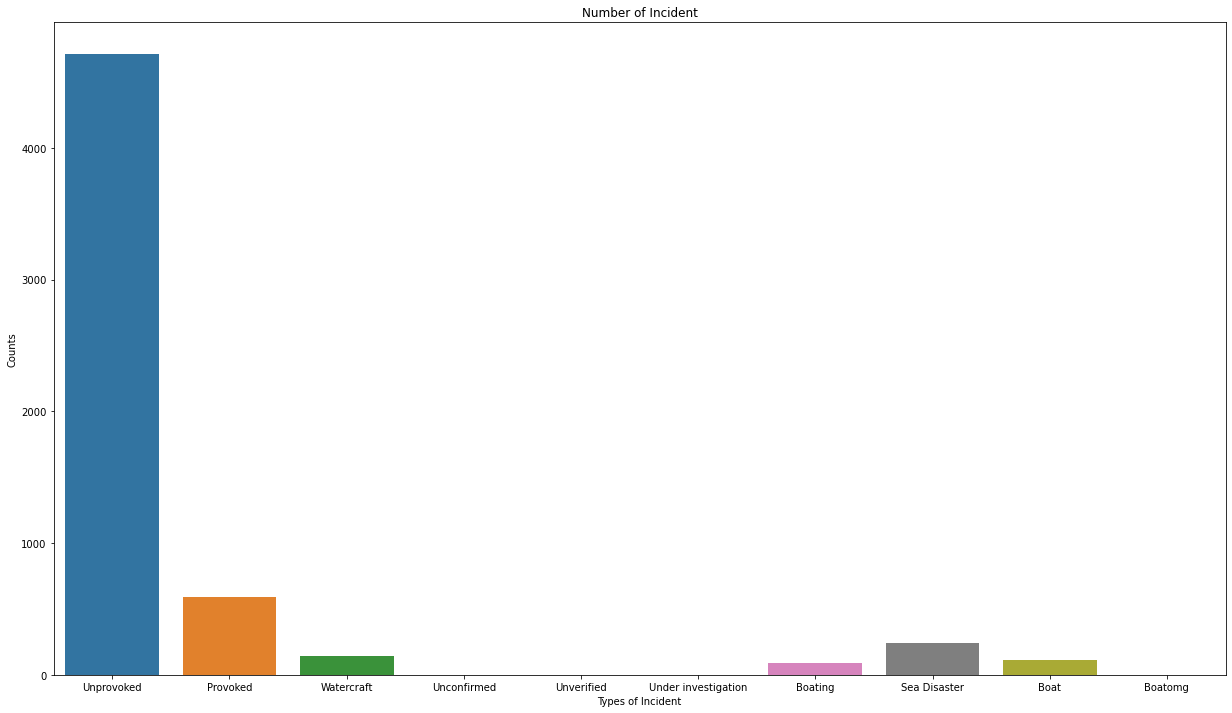

In [970]:
# Visualizing the type of Incident 
gsaf = gsaf[gsaf['Type']!='Unknown'] #<--- to plot without the Unknown value
gsaf = gsaf[gsaf['Type']!='Invalid'] #<-- to ommit the Invalid value 
gsaf = gsaf[gsaf['Type']!='Questionable'] #<-- to plot without the Questionable value 
plt.figure(figsize=(21,12)) # <-- defining the size of the bar
sns.countplot(gsaf['Type'])
plt.xlabel('Types of Incident')
plt.ylabel('Counts')
plt.title('Number of Incident')

Based on the countplot above, we have a very high Unprovoked cases compare to other cases

# Task 2. Fatalities recorded

In [971]:
# Checking our Fatalities column
gsaf['Fatalities']

0       N
1       N
2       N
3       N
4       N
       ..
6457    Y
6458    Y
6459    Y
6460    Y
6461    Y
Name: Fatalities, Length: 5895, dtype: object

Text(0.5, 1.0, 'Number of Fatalities')

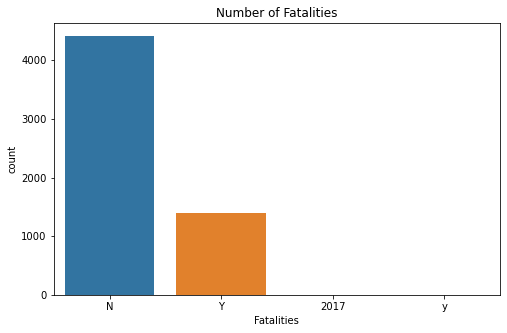

In [972]:
gsaf = gsaf[gsaf['Fatalities']!='Unknown']
gsaf = gsaf[gsaf['Fatalities']!='UNKNOWN']
gsaf = gsaf[gsaf['Fatalities']!='M']
gsaf = gsaf[gsaf['Fatalities']!= 2017]
figure = plt.figure(figsize=(8,5))
gsaf['Fatalities'].value_counts().astype(int)
sns.countplot(gsaf['Fatalities'])
plt.title('Number of Fatalities')

# Task 3. The shark species involved

Text(0.5, 1.0, 'Type of Species')

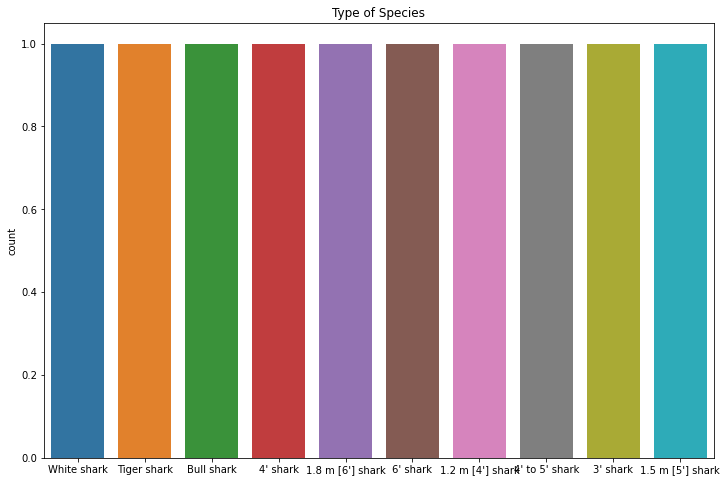

In [1000]:
gsaf = gsaf[gsaf['Species']!='Unknown']
figure = plt.figure(figsize=(12,8))
sns.countplot(gsaf['Species'].value_counts().index[:10])
plt.title('Type of Species')

On the plot above we took the first 10 Species of the attack as we can see they are all on the same level which mean that we have equal numbers of the different Specie 

# Task 4. The Top 20 Activities of the human

In [974]:
gsaf['Activity']

0       Stand-Up Paddle boarding
2                        Surfing
3                        Surfing
6                       Swimming
7                   Scuba diving
                  ...           
6436                    Standing
6453                     Fishing
6454                     Fishing
6455                     Fishing
6456                    Swimming
Name: Activity, Length: 2976, dtype: object

Text(0, 0.5, 'Activities')

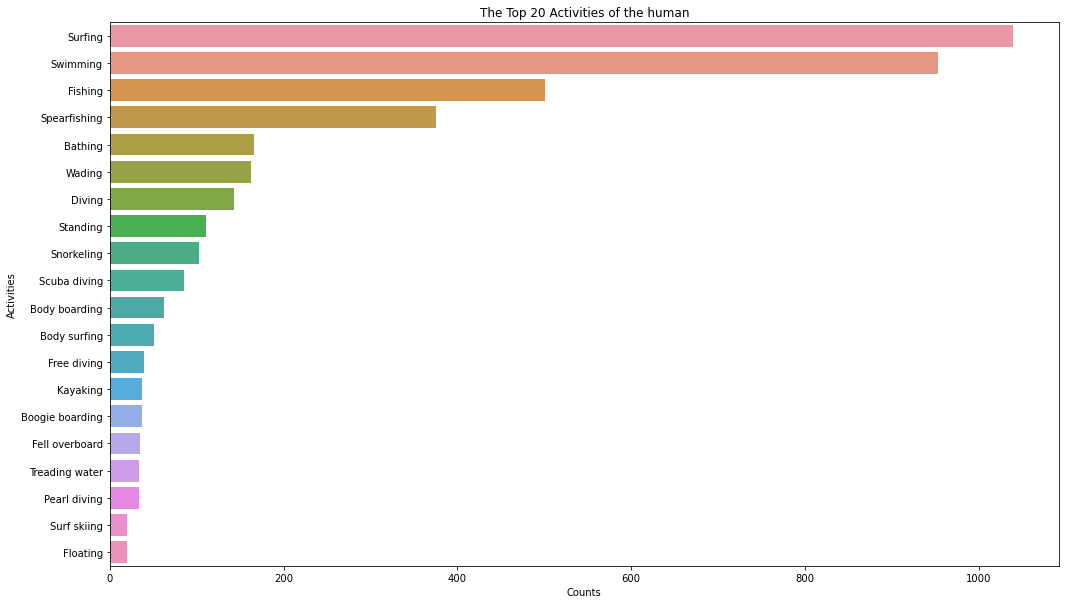

In [975]:

plt.figure(figsize=(17,10))
sns.countplot(y = filtered_activity, order= filtered_activity.value_counts().index[0:20])
plt.title('The Top 20 Activities of the human')
plt.xlabel('Counts')
plt.ylabel('Activities')

When we checked The top 20 human activities we have surfing as the activity that most human engaged in followed by swimming, while floating was the least engaged

# Task 5. The Top 10 Countries Affected

In [1012]:
gsaf['Country'].value_counts()[0:20]

USA                 866
AUSTRALIA           465
SOUTH AFRICA        251
BAHAMAS              50
NEW ZEALAND          39
BRAZIL               23
REUNION              22
PAPUA NEW GUINEA     19
MEXICO               18
EGYPT                15
NEW CALEDONIA        14
ITALY                13
FRENCH POLYNESIA     11
MOZAMBIQUE           11
FIJI                 10
SPAIN                 8
CROATIA               7
JAPAN                 7
PANAMA                6
UNITED KINGDOM        5
Name: Country, dtype: int64

Text(0.5, 1.0, 'Top 10 Countries affected by the attack')

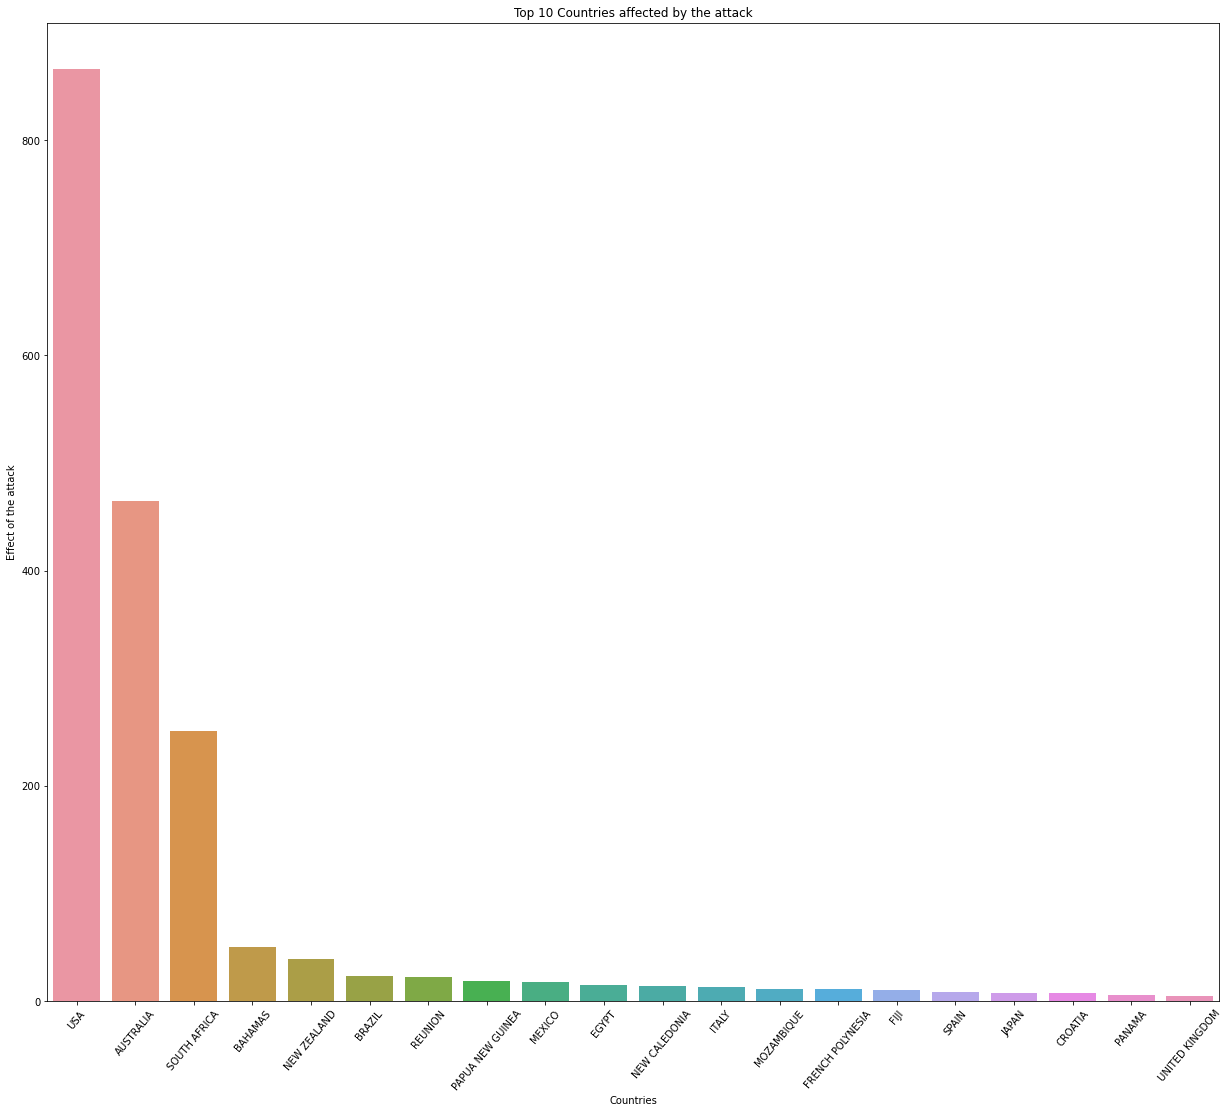

In [1011]:
filter_countries = gsaf.set_index('Area')['Country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_countries = filter_countries[filter_countries != 'Unknown']

plt.figure(figsize=(21,18))
sns.countplot(filtered_countries, order= filtered_countries.value_counts().index[:20])
plt.xlabel('Countries')
plt.tick_params(axis= 'x', labelrotation=50)
plt.ylabel('Effect of the attack')
plt.title('Top 10 Countries affected by the attack')

With the visual representation above, 
- USA is most affected country followed by Australia
- Croatia and Japan have the same level of attacks
- FRENCH POLYNESIA and MOZAMBIQUE also have same level of atacks

# Task 6. The Top 10 Areas

In [978]:
gsaf['Area']

0                    Maui
2         New South Wales
3               Southland
6              Queensland
7       Western Australia
              ...        
6436              Unknown
6453              Unknown
6454              Unknown
6455              Unknown
6456      New South Wales
Name: Area, Length: 2976, dtype: object

Text(0.5, 1.0, 'Top 20 Areas affected by the attack')

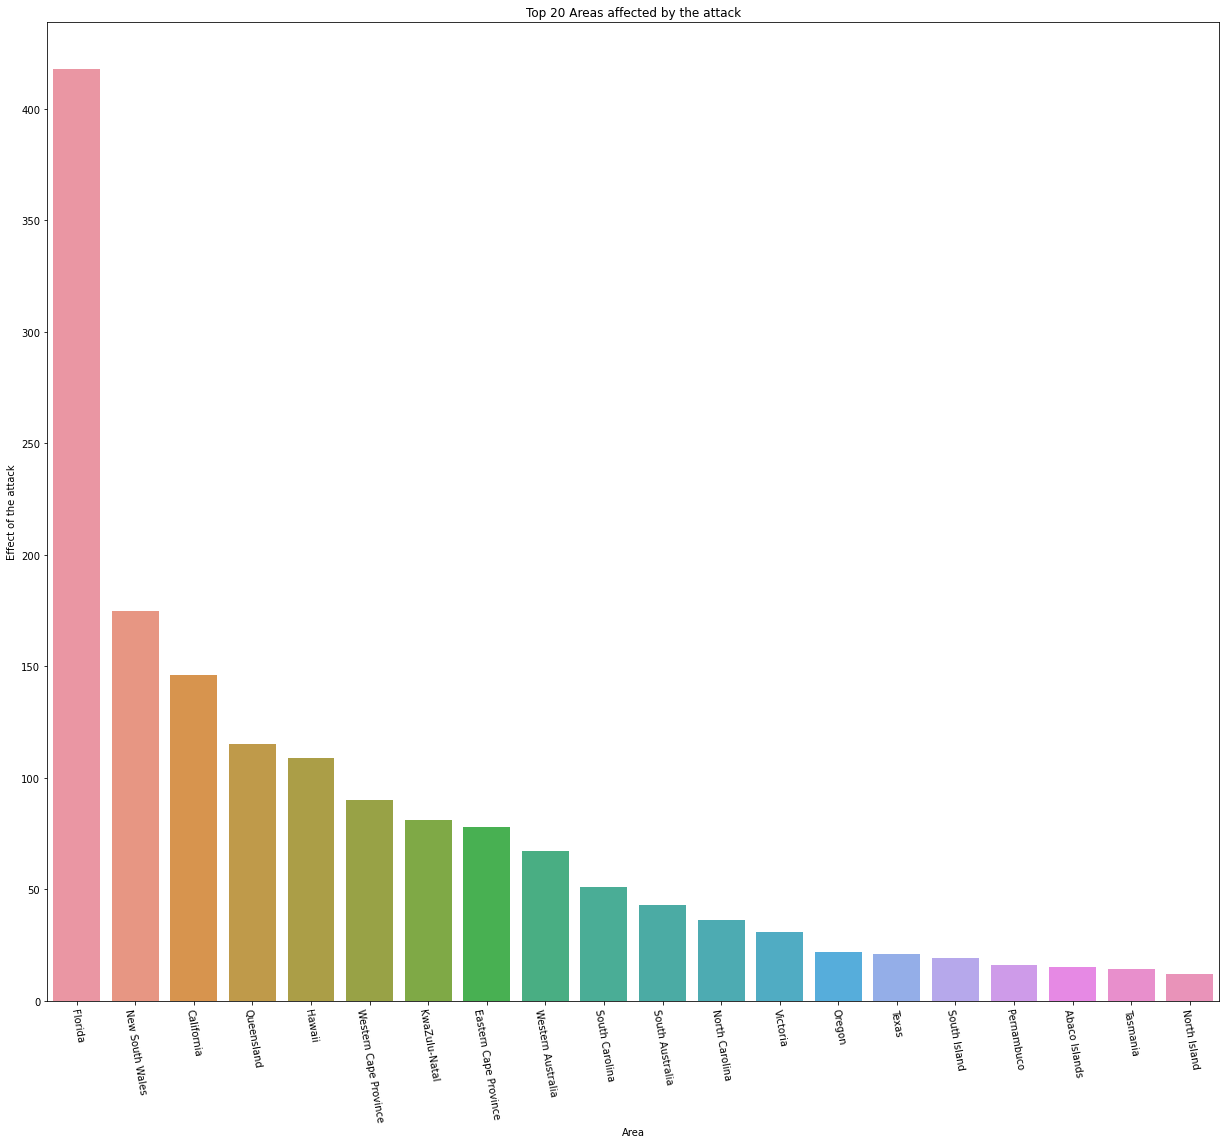

In [1016]:
# Top 10 areas that was affected

filter_areas = gsaf.set_index('Fatalities')['Area'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filter_areas = filter_areas[filter_areas != 'Unknown']

plt.figure(figsize=(21,18))
sns.countplot(filter_areas, order= filter_areas.value_counts().index[:20])
plt.xlabel('Area')
plt.tick_params(axis= 'x', labelrotation=1000)
plt.ylabel('Effect of the attack')
plt.title('Top 20 Areas affected by the attack')

- Florida  is the most affected area of the shark attack
- Tasmania, Pemambuco and Abaco Islands have the same level
- North Island happens to be the least affected area

In [980]:
gsaf = gsaf[gsaf['Age']!='Unknown']

In [981]:
# checking the buttom of the age column
gsaf['Age'].tail()

6399        36.0
6402         6.0
6403        16.0
6425    13 or 14
6436        16.0
Name: Age, dtype: object

Text(0.5, 1.0, 'Age distribution of victims')

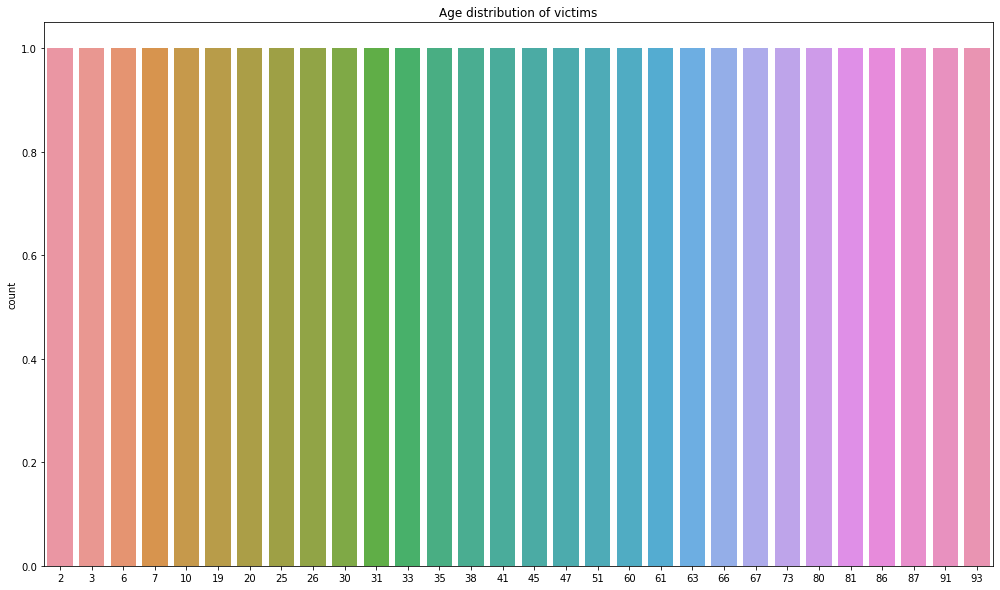

In [982]:
figure = plt.figure(figsize=(17,10))
gsaf['Age'].value_counts()
sns.countplot(gsaf['Age'].index[0:30])
plt.title('Age distribution of victims')

The age distribution of the attacks is of the same level with this there was no particular age that was more or least affected

# Age distribution using Histogram

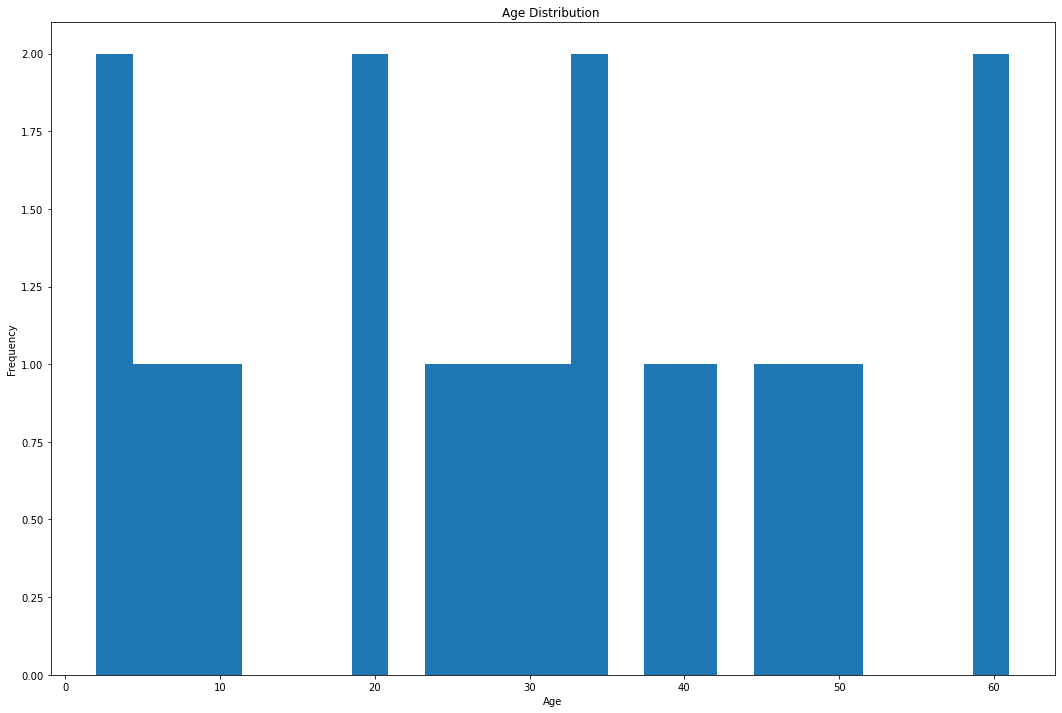

In [1013]:
# Age distribution using histogram
plt.figure(figsize=(18,12))
plt.hist(gsaf['Age'].index[0:20], bins=25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution ')
plt.grid(False)
plt.show()

# Checking the injury sustained

In [1018]:
gsaf['Injury']

2                   Laceration ot left ankle and foot
3                           Minor injury to lower leg
6                                  Lacerations to leg
7                                               FATAL
10                               Minor injury to hand
                            ...                      
6399                                 Bumped by sharks
6402                                      Arm severed
6403       Right leg lacerated & surgically amputated
6425    FATAL, left leg bitten with severe blood loss
6436                                            FATAL
Name: Injury, Length: 2008, dtype: object

Text(0.5, 1.0, 'Top 30 injury type sustained')

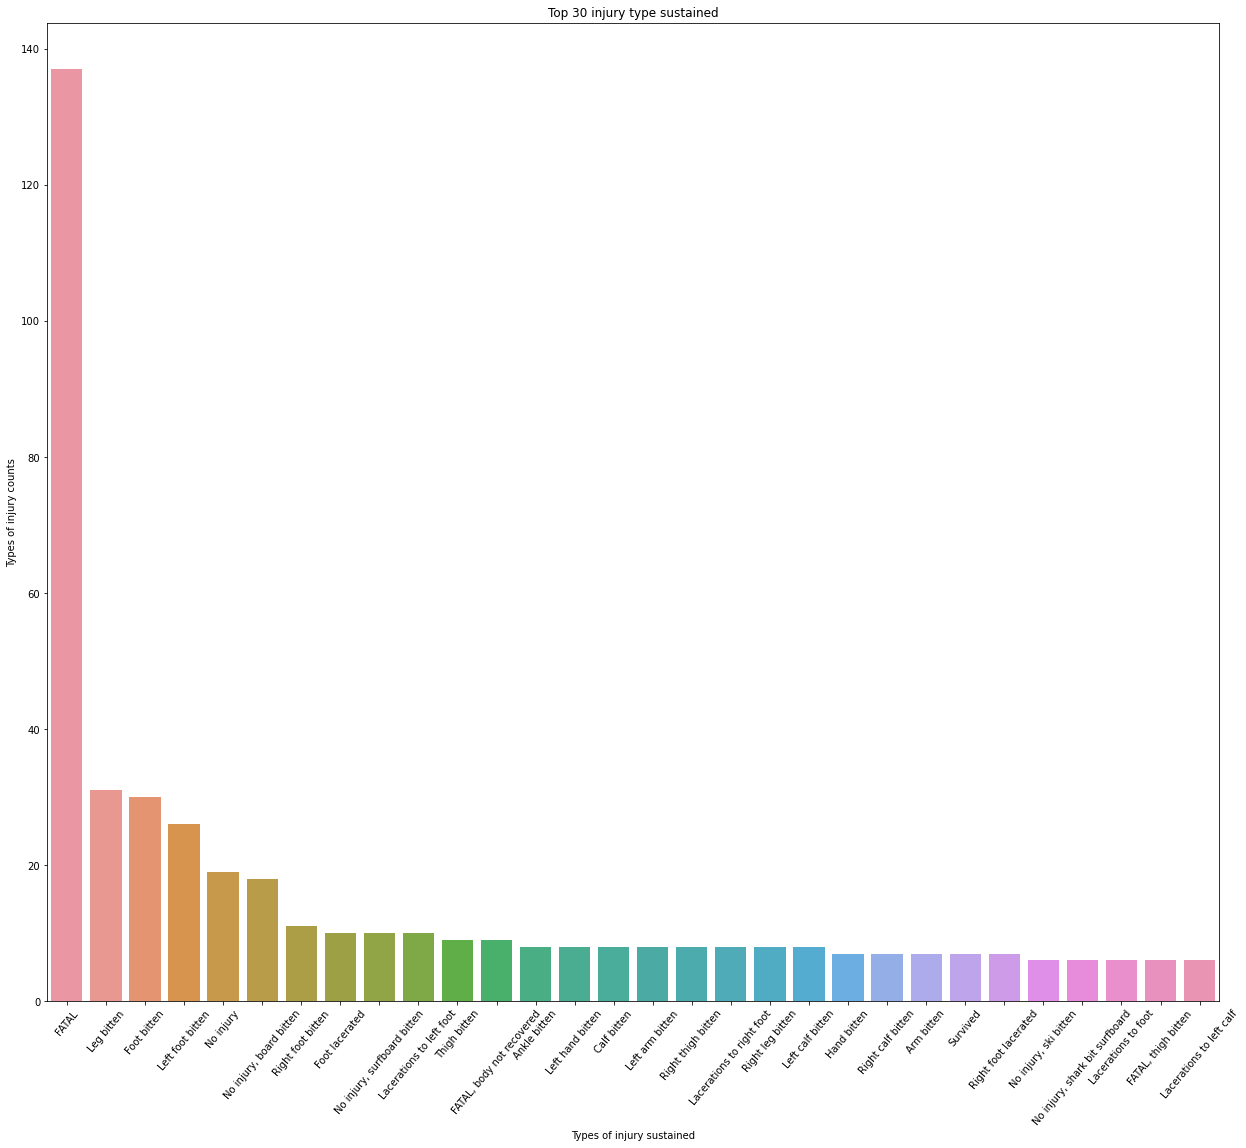

In [984]:
plt.figure(figsize=(21,18))
sns.countplot(gsaf['Injury'], order= gsaf['Injury'].value_counts().index[:30])
plt.xlabel('Types of injury sustained')
plt.tick_params(axis= 'x', labelrotation=50)
plt.ylabel('Types of injury counts')
plt.title('Top 30 injury type sustained')

The plot shows that there are more fatal injury from the attack, and we have the same level of injury for left calf bitten, Right foot lacerated, left leg bitten, Heel bitten, Lacerations to right hand, Lacerations to leg and Right thigh bitten.

In [985]:
gsaf.head()

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatalities,Time,Species,Investigator
2,2020.01.17,17-Jan-2020,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020.01.16,16-Jan-2020,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
6,2020.01.07,07-Jan-2020,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,Miah Holmes,7,Lacerations to leg,N,17h30,Lemon shark,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
7,2020.01.05,05-Jan-2020,Unprovoked,AUSTRALIA,Western Australia,Cull Island / Esperance,Scuba diving,Gary Johnson,57,FATAL,Y,13h00,White shark,"B. Myatt, GSAF"
10,2019.12.30,30-Dec-2019,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,male,30s,Minor injury to hand,N,12h58,"Shovelnose ""shark"" which is a ray, not a shark)","B. Myatt, GSAF"


In [986]:
# converting the date 
# gsaf['Date'] = gsaf['Date'].str.replace('Reported', '')

In [987]:
# gsaf['Date'] = gsaf['Date'].str.replace('--', '-')

In [988]:
# gsaf['Date'] = gsaf['Date'].str.replace('Late', '')
# gsaf['Date'] = gsaf['Date'].str.replace('Summer', '')

In [989]:

# gsaf = gsaf[gsaf['Date'] != 'Unknown']

In [990]:
# We can use 'errors = "coerce"', to ignore all unwanted values present in the date column
gsaf['Date'] = pd.to_datetime(gsaf['Date'], errors="coerce")

gsaf['Date_Reported'] = gsaf['Date'].dt.year
gsaf.head()

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatalities,Time,Species,Investigator,Date_Reported
2,2020.01.17,2020-01-17,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.0
3,2020.01.16,2020-01-16,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.0
6,2020.01.07,2020-01-07,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,Miah Holmes,7,Lacerations to leg,N,17h30,Lemon shark,"B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.0
7,2020.01.05,2020-01-05,Unprovoked,AUSTRALIA,Western Australia,Cull Island / Esperance,Scuba diving,Gary Johnson,57,FATAL,Y,13h00,White shark,"B. Myatt, GSAF",2020.0
10,2019.12.30,2019-12-30,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,male,30s,Minor injury to hand,N,12h58,"Shovelnose ""shark"" which is a ray, not a shark)","B. Myatt, GSAF",2019.0


# Plotting to check the Fatalities Column and the Attack types

Text(0.5, 1.0, 'Type of attacks')

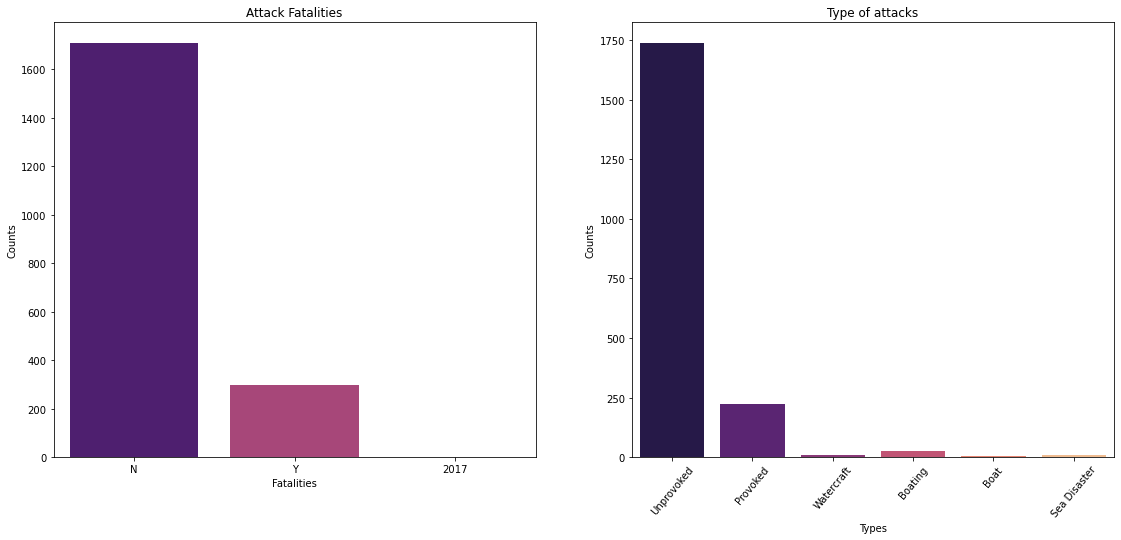

In [991]:
fig, ax = plt.subplots(1,2,figsize=(19,8))
g1 = sns.countplot(gsaf['Fatalities'], palette = 'magma', ax = ax[0])
g1.set_title('Attack Fatalities')
g1.set_xlabel('Fatalities')
g1.set_ylabel('Counts')
plt.tick_params(axis= 'x', labelrotation=50)
g2 = sns.countplot(gsaf['Type'], palette = 'magma', ax = ax[1])
g2.set_xlabel('Types')
g2.set_ylabel('Counts')
g2.set_title('Type of attacks')

Here we can see the relationship between the Fatalities column and the Types column
- The N value is on the same level with Unprovoked cases 
- The Y value is on same level with the provked cases

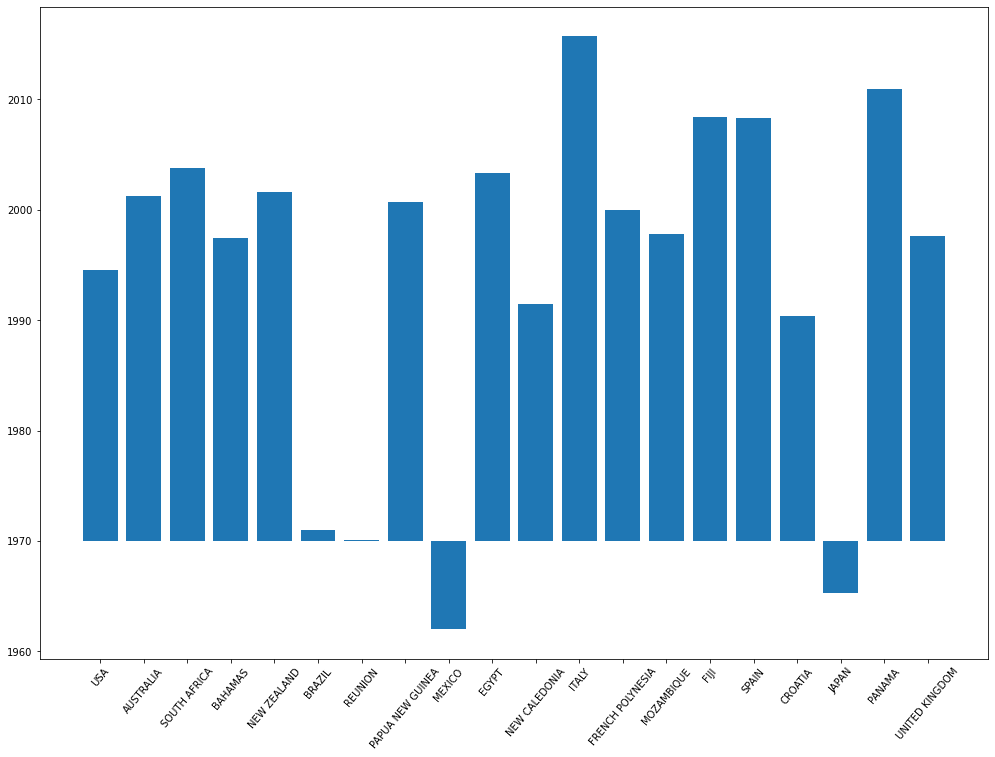

In [1023]:
# using the bar plot to check the first 20 country column and the date column
plt.figure(figsize=(17,12))
plt.bar(gsaf['Country'].value_counts().index[:20], gsaf['Date'].value_counts().index[:20])
plt.tick_params(axis= 'x', labelrotation=50)

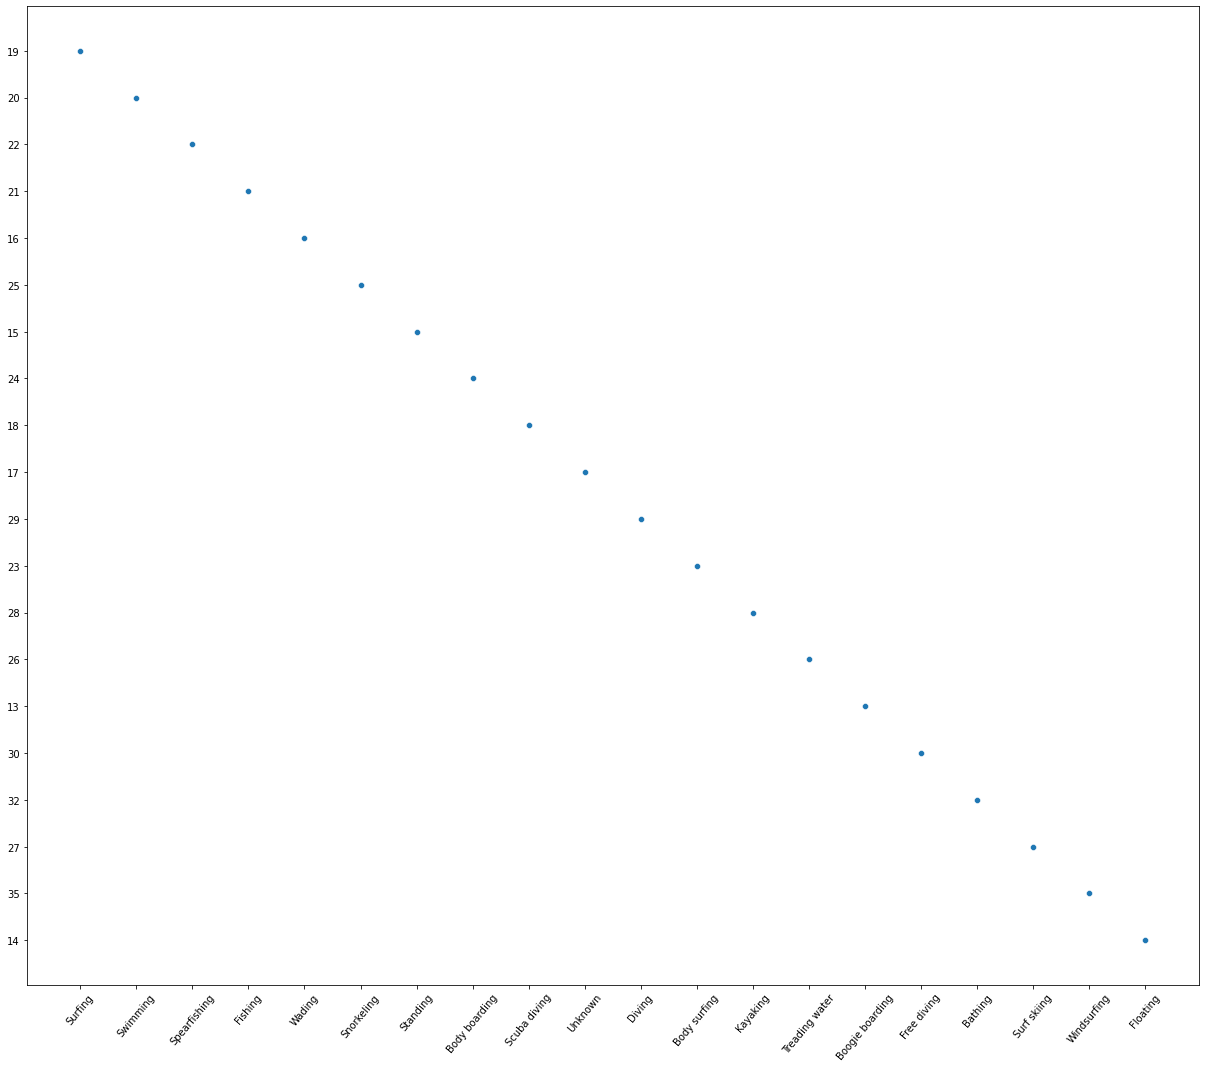

In [1004]:
plt.figure(figsize=(21,18))
sns.scatterplot(gsaf['Activity'].value_counts().index[0:20],gsaf['Age'].value_counts().index[0:20])
plt.tick_params(axis= 'x', labelrotation=50)

Using Scatter plot to get the relationship between age and activity column
- There are more age 19 doing Surfing
- We also have more of age 20 doing swimming activity
- The floating activity has more of age 14 which is the least activity been carried out


<Figure size 1512x1296 with 0 Axes>

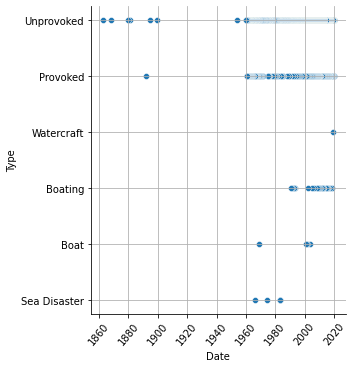

In [1014]:
plt.figure(figsize=(21,18))
sns.relplot(data=gsaf, x='Date', y='Type', kind='scatter')
plt.tick_params(axis= 'x', labelrotation=50)
plt.xticks();
plt.grid();

Using scatter plot to check the date and type of attack
- we can see that the attack first came up in 1860 with the Unprovoked Type
- The provoked type came up between 1880 and 1900

